# Reinforcement Learning Project: Teaching a Quadcopter How to Fly

In this project I have designed an unmanned agent that would use land the quadcopter using a reinforcement learning algorithm.

**Name: Jubin Soni**

**GitHub: [Reinforcement Learning Project](https://github.com/jubins/Deep-Learning-Udacity/tree/master/RL-Quadcopter-2)**

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

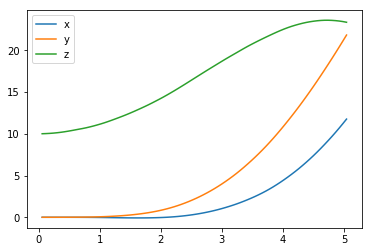

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

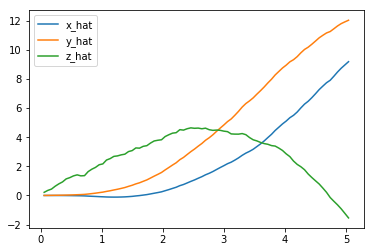

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

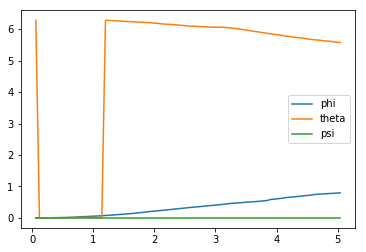

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

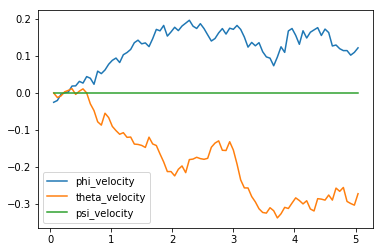

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

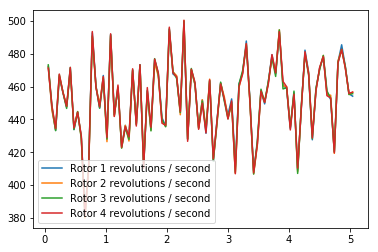

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 11.75953865  21.82652376  23.35813178   0.79675917   5.57455424   0.        ]
[  9.17898049  12.02194336  -1.54025095]
[ 0.12093308 -0.27210291  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.755 (best =  -0.019), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
## TODO: Train your agent here.
import sys
import pandas as pd
from agents.actor import Actor
from agents.ddpg import DDPG
import math
from land_task import Land_Task

num_episodes = 1000
target_pos = np.array([0., 0., 0.])
init_pose = np.array([0.,0.,10., 0., 0., 0.]) #Start in the sky

task = Land_Task(target_pos=target_pos, init_pose=init_pose)
agent = DDPG(task) 
best_reward = -float("inf")
best_episode_reward = -float("inf")
cumSum = 0

labels = ['episode','cummulative']
results = {x : [] for x in labels}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    best_episode_reward = -float("inf")
    cumSum = 0
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        cumSum += reward
        if reward > best_episode_reward:
            best_episode_reward = reward
        if done:
            if best_episode_reward > best_reward:
                best_reward = best_episode_reward
            to_write = [i_episode] + [cumSum]
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            #print("\rEpisode = {:4d} Reward = {:4f} Best Reward = {:4f} Cumulative Reward = {:4f} \n".format(i_episode, best_episode_reward, best_reward, cumSum), task.getPose(), "\n", end="")   # [debug]
            print("\rEpisode = {:4d} Reward = {:4f} Best Reward = {:4f} Cumulative Reward = {:4f}".format(i_episode, best_episode_reward, best_reward, cumSum))   # [debug]
            break
    sys.stdout.flush()

Using TensorFlow backend.


Episode =    1 Reward = 0.325596 Best Reward = 0.325596 Cumulative Reward = 1.456589
Episode =    2 Reward = 0.374992 Best Reward = 0.374992 Cumulative Reward = 2.052741
Episode =    3 Reward = 0.512952 Best Reward = 0.512952 Cumulative Reward = 1.896500
Episode =    4 Reward = 0.223047 Best Reward = 0.512952 Cumulative Reward = 1.380374
Episode =    5 Reward = 0.153561 Best Reward = 0.512952 Cumulative Reward = 1.408934
Episode =    6 Reward = 0.188052 Best Reward = 0.512952 Cumulative Reward = 1.546666
Episode =    7 Reward = 0.232886 Best Reward = 0.512952 Cumulative Reward = 1.662639
Episode =    8 Reward = 0.087739 Best Reward = 0.512952 Cumulative Reward = 0.635205
Episode =    9 Reward = 0.538878 Best Reward = 0.538878 Cumulative Reward = 1.975384
Episode =   10 Reward = 0.164965 Best Reward = 0.538878 Cumulative Reward = 1.485966
Episode =   11 Reward = 0.194201 Best Reward = 0.538878 Cumulative Reward = 1.088395
Episode =   12 Reward = 0.188842 Best Reward = 0.538878 Cumulativ

Episode =   98 Reward = 0.448295 Best Reward = 0.538878 Cumulative Reward = 3.135170
Episode =   99 Reward = 0.299436 Best Reward = 0.538878 Cumulative Reward = 2.379970
Episode =  100 Reward = 0.198375 Best Reward = 0.538878 Cumulative Reward = 1.833136
Episode =  101 Reward = 0.245569 Best Reward = 0.538878 Cumulative Reward = 2.447966
Episode =  102 Reward = 0.440373 Best Reward = 0.538878 Cumulative Reward = 3.666111
Episode =  103 Reward = 0.471996 Best Reward = 0.538878 Cumulative Reward = 3.113286
Episode =  104 Reward = 0.471727 Best Reward = 0.538878 Cumulative Reward = 2.908424
Episode =  105 Reward = 0.148931 Best Reward = 0.538878 Cumulative Reward = 1.217420
Episode =  106 Reward = 0.234121 Best Reward = 0.538878 Cumulative Reward = 2.123799
Episode =  107 Reward = 0.523145 Best Reward = 0.538878 Cumulative Reward = 3.165519
Episode =  108 Reward = 0.237927 Best Reward = 0.538878 Cumulative Reward = 2.222996
Episode =  109 Reward = 0.440883 Best Reward = 0.538878 Cumulativ

Episode =  195 Reward = 0.726128 Best Reward = 0.726128 Cumulative Reward = 3.170240
Episode =  196 Reward = 0.369499 Best Reward = 0.726128 Cumulative Reward = 3.655629
Episode =  197 Reward = 0.259178 Best Reward = 0.726128 Cumulative Reward = 1.811730
Episode =  198 Reward = 0.201289 Best Reward = 0.726128 Cumulative Reward = 1.443755
Episode =  199 Reward = 0.207609 Best Reward = 0.726128 Cumulative Reward = 1.858412
Episode =  200 Reward = 0.416655 Best Reward = 0.726128 Cumulative Reward = 3.769135
Episode =  201 Reward = 0.286263 Best Reward = 0.726128 Cumulative Reward = 2.258910
Episode =  202 Reward = 0.222945 Best Reward = 0.726128 Cumulative Reward = 1.968909
Episode =  203 Reward = 0.220885 Best Reward = 0.726128 Cumulative Reward = 1.847385
Episode =  204 Reward = 0.300264 Best Reward = 0.726128 Cumulative Reward = 2.642819
Episode =  205 Reward = 0.237067 Best Reward = 0.726128 Cumulative Reward = 1.839846
Episode =  206 Reward = 0.490141 Best Reward = 0.726128 Cumulativ

Episode =  292 Reward = 0.163615 Best Reward = 0.956683 Cumulative Reward = 1.023724
Episode =  293 Reward = 0.224364 Best Reward = 0.956683 Cumulative Reward = 1.958233
Episode =  294 Reward = 0.392086 Best Reward = 0.956683 Cumulative Reward = 2.488609
Episode =  295 Reward = 0.268023 Best Reward = 0.956683 Cumulative Reward = 2.827079
Episode =  296 Reward = 0.213786 Best Reward = 0.956683 Cumulative Reward = 1.335942
Episode =  297 Reward = 0.175866 Best Reward = 0.956683 Cumulative Reward = 1.031792
Episode =  298 Reward = 0.142401 Best Reward = 0.956683 Cumulative Reward = 1.543475
Episode =  299 Reward = 0.190750 Best Reward = 0.956683 Cumulative Reward = 1.320109
Episode =  300 Reward = 0.282706 Best Reward = 0.956683 Cumulative Reward = 2.709527
Episode =  301 Reward = 0.452343 Best Reward = 0.956683 Cumulative Reward = 1.788618
Episode =  302 Reward = 0.263469 Best Reward = 0.956683 Cumulative Reward = 1.925088
Episode =  303 Reward = 0.252861 Best Reward = 0.956683 Cumulativ

Episode =  389 Reward = 0.357468 Best Reward = 1.693262 Cumulative Reward = 1.165541
Episode =  390 Reward = 0.299305 Best Reward = 1.693262 Cumulative Reward = 1.926542
Episode =  391 Reward = 0.245098 Best Reward = 1.693262 Cumulative Reward = 1.600503
Episode =  392 Reward = 0.159930 Best Reward = 1.693262 Cumulative Reward = 1.304469
Episode =  393 Reward = 0.063899 Best Reward = 1.693262 Cumulative Reward = 0.824887
Episode =  394 Reward = 0.165645 Best Reward = 1.693262 Cumulative Reward = 3.181525
Episode =  395 Reward = 0.060625 Best Reward = 1.693262 Cumulative Reward = 1.249249
Episode =  396 Reward = 0.254470 Best Reward = 1.693262 Cumulative Reward = 3.009061
Episode =  397 Reward = 0.158489 Best Reward = 1.693262 Cumulative Reward = 2.884582
Episode =  398 Reward = 0.250859 Best Reward = 1.693262 Cumulative Reward = 2.358265
Episode =  399 Reward = 0.271421 Best Reward = 1.693262 Cumulative Reward = 1.321171
Episode =  400 Reward = 0.087925 Best Reward = 1.693262 Cumulativ

Episode =  486 Reward = 0.347409 Best Reward = 1.693262 Cumulative Reward = 2.183300
Episode =  487 Reward = 0.719414 Best Reward = 1.693262 Cumulative Reward = 3.123395
Episode =  488 Reward = 0.193074 Best Reward = 1.693262 Cumulative Reward = 1.365385
Episode =  489 Reward = 0.209799 Best Reward = 1.693262 Cumulative Reward = 3.082264
Episode =  490 Reward = 0.218025 Best Reward = 1.693262 Cumulative Reward = 0.996951
Episode =  491 Reward = 0.083189 Best Reward = 1.693262 Cumulative Reward = 0.769922
Episode =  492 Reward = 0.304508 Best Reward = 1.693262 Cumulative Reward = 1.851778
Episode =  493 Reward = 0.315498 Best Reward = 1.693262 Cumulative Reward = 1.865731
Episode =  494 Reward = 0.240489 Best Reward = 1.693262 Cumulative Reward = 1.556857
Episode =  495 Reward = 0.453255 Best Reward = 1.693262 Cumulative Reward = 2.790595
Episode =  496 Reward = 0.395897 Best Reward = 1.693262 Cumulative Reward = 1.624721
Episode =  497 Reward = 0.585617 Best Reward = 1.693262 Cumulativ

Episode =  583 Reward = 0.201981 Best Reward = 1.693262 Cumulative Reward = 1.862815
Episode =  584 Reward = 0.070150 Best Reward = 1.693262 Cumulative Reward = 0.598023
Episode =  585 Reward = 0.156087 Best Reward = 1.693262 Cumulative Reward = 1.136020
Episode =  586 Reward = 0.160997 Best Reward = 1.693262 Cumulative Reward = 1.397189
Episode =  587 Reward = 0.218041 Best Reward = 1.693262 Cumulative Reward = 1.651407
Episode =  588 Reward = 0.333459 Best Reward = 1.693262 Cumulative Reward = 2.683592
Episode =  589 Reward = 0.232619 Best Reward = 1.693262 Cumulative Reward = 1.025152
Episode =  590 Reward = 0.294192 Best Reward = 1.693262 Cumulative Reward = 1.981118
Episode =  591 Reward = 0.213772 Best Reward = 1.693262 Cumulative Reward = 1.446931
Episode =  592 Reward = 0.142654 Best Reward = 1.693262 Cumulative Reward = 1.205328
Episode =  593 Reward = 0.134169 Best Reward = 1.693262 Cumulative Reward = 1.023425
Episode =  594 Reward = 0.313790 Best Reward = 1.693262 Cumulativ

Episode =  680 Reward = 0.145864 Best Reward = 1.693262 Cumulative Reward = 1.388532
Episode =  681 Reward = 0.750710 Best Reward = 1.693262 Cumulative Reward = 2.394836
Episode =  682 Reward = 0.194187 Best Reward = 1.693262 Cumulative Reward = 1.845224
Episode =  683 Reward = 0.173536 Best Reward = 1.693262 Cumulative Reward = 2.844950
Episode =  684 Reward = 0.179728 Best Reward = 1.693262 Cumulative Reward = 5.193545
Episode =  685 Reward = 0.166015 Best Reward = 1.693262 Cumulative Reward = 2.452391
Episode =  686 Reward = 0.100464 Best Reward = 1.693262 Cumulative Reward = 0.878376
Episode =  687 Reward = 0.167587 Best Reward = 1.693262 Cumulative Reward = 1.407727
Episode =  688 Reward = 0.306787 Best Reward = 1.693262 Cumulative Reward = 1.966524
Episode =  689 Reward = 0.278830 Best Reward = 1.693262 Cumulative Reward = 1.703013
Episode =  690 Reward = 0.402467 Best Reward = 1.693262 Cumulative Reward = 1.952042
Episode =  691 Reward = 0.336487 Best Reward = 1.693262 Cumulativ

Episode =  777 Reward = 1.086942 Best Reward = 1.693262 Cumulative Reward = 5.464027
Episode =  778 Reward = 1.064263 Best Reward = 1.693262 Cumulative Reward = 5.552721
Episode =  779 Reward = 0.922616 Best Reward = 1.693262 Cumulative Reward = 4.978753
Episode =  780 Reward = 0.870435 Best Reward = 1.693262 Cumulative Reward = 5.383032
Episode =  781 Reward = 0.279025 Best Reward = 1.693262 Cumulative Reward = 2.904930
Episode =  782 Reward = 0.887400 Best Reward = 1.693262 Cumulative Reward = 4.954142
Episode =  783 Reward = 1.067420 Best Reward = 1.693262 Cumulative Reward = 4.955313
Episode =  784 Reward = 0.879444 Best Reward = 1.693262 Cumulative Reward = 4.613954
Episode =  785 Reward = 0.995473 Best Reward = 1.693262 Cumulative Reward = 4.782602
Episode =  786 Reward = 1.037957 Best Reward = 1.693262 Cumulative Reward = 4.889416
Episode =  787 Reward = 0.755556 Best Reward = 1.693262 Cumulative Reward = 4.748330
Episode =  788 Reward = 0.827451 Best Reward = 1.693262 Cumulativ

Episode =  874 Reward = 0.544812 Best Reward = 1.693262 Cumulative Reward = 2.067684
Episode =  875 Reward = 0.556289 Best Reward = 1.693262 Cumulative Reward = 2.125827
Episode =  876 Reward = 0.843106 Best Reward = 1.693262 Cumulative Reward = 3.426267
Episode =  877 Reward = 1.394036 Best Reward = 1.693262 Cumulative Reward = 3.532260
Episode =  878 Reward = 0.745717 Best Reward = 1.693262 Cumulative Reward = 2.409139
Episode =  879 Reward = 0.530047 Best Reward = 1.693262 Cumulative Reward = 2.154395
Episode =  880 Reward = 0.902548 Best Reward = 1.693262 Cumulative Reward = 3.287454
Episode =  881 Reward = 0.607573 Best Reward = 1.693262 Cumulative Reward = 3.058095
Episode =  882 Reward = 0.749129 Best Reward = 1.693262 Cumulative Reward = 2.272740
Episode =  883 Reward = 0.522056 Best Reward = 1.693262 Cumulative Reward = 1.996570
Episode =  884 Reward = 0.180632 Best Reward = 1.693262 Cumulative Reward = 1.350926
Episode =  885 Reward = 0.526786 Best Reward = 1.693262 Cumulativ

Episode =  971 Reward = 0.560257 Best Reward = 1.693262 Cumulative Reward = 3.626616
Episode =  972 Reward = 0.410098 Best Reward = 1.693262 Cumulative Reward = 3.688485
Episode =  973 Reward = 0.493178 Best Reward = 1.693262 Cumulative Reward = 3.911423
Episode =  974 Reward = 0.461462 Best Reward = 1.693262 Cumulative Reward = 3.955302
Episode =  975 Reward = 0.848477 Best Reward = 1.693262 Cumulative Reward = 4.317756
Episode =  976 Reward = 0.496934 Best Reward = 1.693262 Cumulative Reward = 4.176003
Episode =  977 Reward = 0.431890 Best Reward = 1.693262 Cumulative Reward = 3.760914
Episode =  978 Reward = 1.200713 Best Reward = 1.693262 Cumulative Reward = 5.117245
Episode =  979 Reward = 0.488590 Best Reward = 1.693262 Cumulative Reward = 4.770971
Episode =  980 Reward = 0.945935 Best Reward = 1.693262 Cumulative Reward = 4.162482
Episode =  981 Reward = 0.417575 Best Reward = 1.693262 Cumulative Reward = 3.844919
Episode =  982 Reward = 0.745692 Best Reward = 1.693262 Cumulativ

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

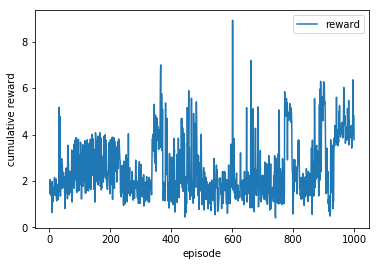

In [11]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['cummulative'], label='reward')
plt.xlabel('episode')
plt.ylabel('cumulative reward')
plt.legend()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
The task I designed was fairly simple of having the quadcopter model land (z = 0) from an initial starting height and no initial velocity. I defined my task in `land_task.py` and inherited and overridden some properties of the `land.py`. I designed the reward function by calcuating the z distance of the quad from the ground plane, using the pythagorean distance from the quad to the origin. However the result was not very good. So I added a penalty factor for large yaw, pitch and roll angles where a scaling factor multiplied the reward based on the angle (small angle : low penalty, high angle : high penalty).

But the problem with above reward function was that the reward was not constrained to stay positive and I found this caused the progress of learning to stagnate. I modified my reward function to remain positive regardless of the penalty i.e keeping the lowest possible reward to 0. As the quad flew further from the ground plane, the function would take into account a decay factor which when added to the total reward would eventually result in a reward of zero. This resulted in some results that seem reasonable, the overall reward per episode approaches an asymptotic reward limit just under 10 after about 250 episodes. Comparing this to previous attempts, the training graph looked like chaotic noise with no obvious trend.

I feel using ensuring that the reward stayed positive and the combination of using two penalty factors has resulted in the best learning performance.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
- I tried and modified a few things in order to get the model to learn. I used the DDPG template code provided with slight modifications to hyper parameters and Actor and Critic net architecture. I primarily focused on designing a suitable reward function as that was the most challenging task. Designing an approprate reward function yeilded good results.

- Following the DDPG template, I only made slight modifications to some of the explorations parameters, reducing $\theta$ to 0.075 and $\sigma$ to 0.1. I also reduced $\gamma$ to 0.75. 

- I chose to stay with the simple network architecture provided in the template actor and critic classes and did not make any modifications there.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
Initially, it was very difficult to conceptually determine what kind of reward function would result in good learning performance. IT took a lot of time to design a decent reward function in place, then it was more of trial and error as I just made minor tweaks to achieve even better results. The key was to design the reward function so the learning trend is atleast positive.
From the graph, it can be seen that there is quite a big improvement after about 250 episodes. Then the values approach a max of about 10.

As you can see below, the reward over last 10 episodes is 4.317 and in the initial 10 episodes it was 1.550. This is quite a large improvement over the mean reward function compared to the start of learning.

In [12]:
mean = np.mean(results['cummulative'][-10:])
print("The mean reward over the last 10 episodes is: ",mean)
mean = np.mean(results['cummulative'][:10])
print("The mean reward over the first 10 episodes is: ",mean)

The mean reward over the last 10 episodes is:  4.3170356012
The mean reward over the first 10 episodes is:  1.55009963541


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
Defining a suitable reward function was the most challenging part of this project, even getting started and then a lot of trial and error. It was interesting to see that in some episodes the quad would make large angular movements which was unexpected.

I wanted to try and implement some other functions like Take off and Hover then Land, however due to time constraints I was not able to give these a shot. Overall I've really enjoyed this project and the nano degree in general. I would design some other simple functions and add to this project in future.

#### Thank you